# <center> Example usage of MeanVariance class </center>
author: Leandro Salemi <br> email: salemileandro@gmail.com

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pynanz as pn

In [2]:
# Downloading data

tickers = ["AAPL", "USFD", "ARKF", "AIR.PA", "NVDA", "KO", "LMND", "CLOU", "GOOG"]
start = pd.Timestamp("2020-01-01")
threshold_date = start

mkt = pn.Market()
if not os.path.isfile("meanvariance_data.pkl"):
    mkt.download(tickers=tickers, start=start, threshold_date=threshold_date)
    mkt.save("meanvariance_data.pkl")
else:
    mkt = pn.Market.load("meanvariance_data.pkl")
mkt.data.head()

Skipping LMND starting at 2020-07-02 00:00:00


AAPL                                              \
            adj close      close       high        low       open   
Date                                                                
2020-01-02  73.988472  75.087502  75.150002  73.797501  74.059998   
2020-01-03  73.269157  74.357498  75.144997  74.125000  74.287498   
2020-01-06  73.852989  74.949997  74.989998  73.187500  73.447502   
2020-01-07  73.505646  74.597504  75.224998  74.370003  74.959999   
2020-01-08  74.688072  75.797501  76.110001  74.290001  74.290001   

                             AIR.PA                                      ...  \
                 volume   adj close       close        high         low  ...   
Date                                                                     ...   
2020-01-02  135480400.0  129.288742  133.520004  135.720001  132.020004  ...   
2020-01-03  146322800.0  129.792252  134.039993  134.039993  131.820007  ...   
2020-01-06  118387200.0  129.230637  133.460007  133.820007  131.759995  ...   
2020-01-07  108872000.0  127.816902  132.000000  134.380005  131.820007  ...   
2020-01-08  132079200.0  130.121490  134.380005  134.919998  130.500000  ...   

                 NVDA                                         USFD             \
                 high        low       open      volume  adj close      close   
Date                                                                            
2020-01-02  59.977501  59.180000  59.687500  23753600.0  40.980000  40.980000   
2020-01-03  59.457500  58.525002  58.775002  20538400.0  40.730000  40.730000   
2020-01-06  59.317501  57.817501  58.080002  26263600.0  40.930000  40.930000   
2020-01-07  60.442501  59.097500  59.549999  31485600.0  40.500000  40.500000   
2020-01-08  60.509998  59.537498  59.939999  27710800.0  40.880001  40.880001   

                                                        
                 high        low       open     volume  
Date                                                    
2020-01-02  41.980000  40.750000  41.919998  1787200.0  
2020-01-03  41.033001  40.650002  40.650002  1152800.0  
2020-01-06  41.060001  40.430000  40.599998  1289500.0  
2020-01-07  40.990002  40.490002  40.900002   801000.0  
2020-01-08  41.049999  40.490002  40.549999   863400.0  

[5 rows x 48 columns]

In [10]:
# Initialize the MeanVariance object
mvar = pn.MeanVariance(mkt[:, :, "close"],
                       alpha=0.0,
                       sigma_target=0.20,
                       period=14,
                       horizon=1,
                       max_weight=0.35,
                       add_cash=True)

risk_aversion and sigma_target are both defined, sigma_target takes precedence


In [11]:
# Solve the portfolio optimization
mvar.optimize(n_workers=4) # n_workers controls the number of processes spawned. Set to None to use all cpu's

In [12]:
mvar.portfolio.head()

,AAPL,AIR.PA,ARKF,CLOU,GOOG,KO,NVDA,USFD,CASH,yearly_return,yearly_risk,risk_aversion
2020-01-23,0.30,0.0,0.0,0.350,0.35,0.000,0.0,0.0,0.0,3.791674,0.120831,0.0
2020-01-24,0.30,0.0,0.0,0.350,0.35,0.000,0.0,0.0,0.0,3.646621,0.124517,0.0
2020-01-27,0.30,0.0,0.0,0.350,0.00,0.350,0.0,0.0,0.0,2.043815,0.134525,0.0
2020-01-28,0.35,0.0,0.0,0.312,0.00,0.338,0.0,0.0,0.0,2.688007,0.141519,0.0
2020-01-29,0.35,0.0,0.0,0.000,0.30,0.350,0.0,0.0,0.0,2.578284,0.147403,0.0


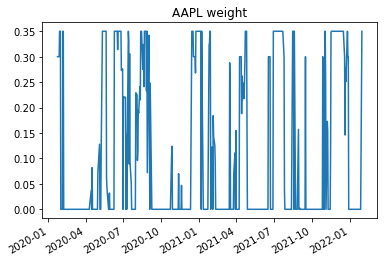

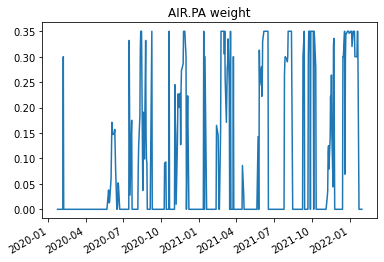

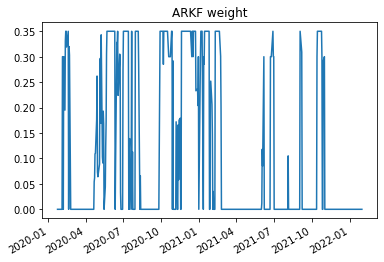

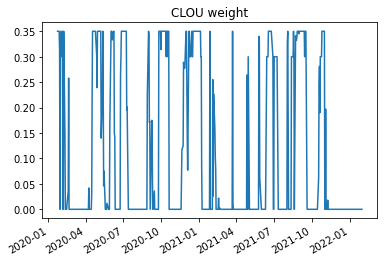

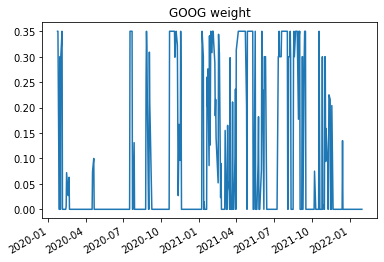

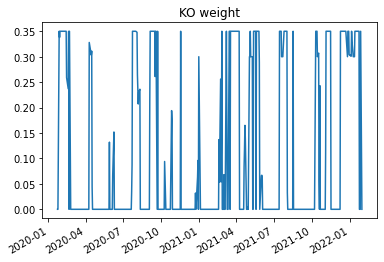

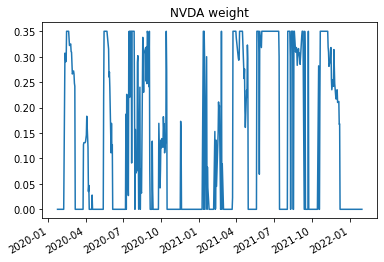

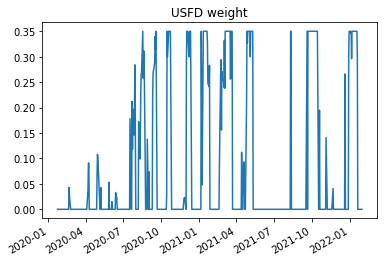

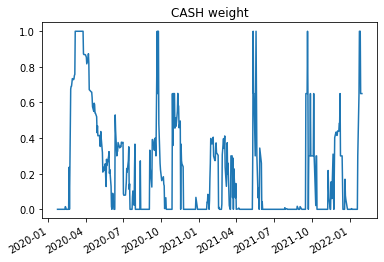

In [13]:
for t in mvar.tickers:
    plt.figure()
    mvar.portfolio[t].plot()
    plt.title("%s weight" % t)

Those plots are the weights in the portfolio according to the mean-variance optimization. Interestingly enough, the mean-variance optimization capture the downtrend of the markets around March 2020 (covid crisis) and allocate the portfolio to CASH (=no investiment) during this period !

Because the optimization is performed for every trading day, it is quite noisy. It is not a good idea to rebalance a portfolio like that everyday due to volatility anyway. This kind of calculation should serve as a guide, not as an automated investment recipe !